In [1]:
import sys
sys.path.insert(0, '/home/nuwah/2023_projects/Statistics-Handbooks') # add path to syspath where top-level of package is

In [2]:
from Regression.LinearRegression import LinearRegressionMethods
from Regression import evaluate
from DataGenerator import DataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

### Linear Regression example

In [22]:
dg = DataGenerator(num_samples=1000, num_features=1, noise_std = 1, seed=42) # Instantiate out Data Generator object
l = dg.generate_linear(intercept=9.5, weights = [10]) # generate some linear data with parameters (B0 is intercept, all other weights B1...Bn are in [weights])
# above data is y = 10x + 9.5 + gaussian noise

<Axes: >

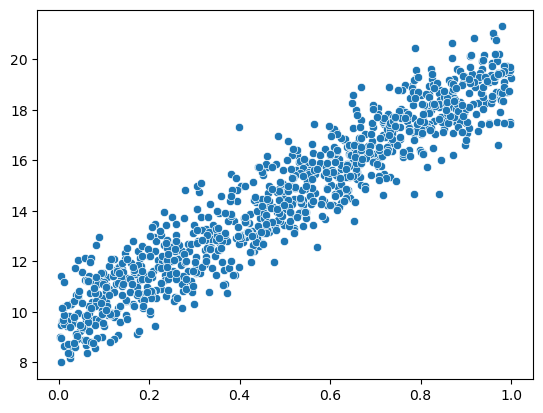

In [23]:
# Plot our noisy data
sns.scatterplot(x=l[0].flatten(), y=l[1])

In [24]:
# Instantiate linear regression object
lr = LinearRegressionMethods(l[0], l[1])
# Solve the linear regression regression by gradient descent
lr = lr.mse_gradient_descent(num_iters=1000)

Execution time : 13891251ns == 0.013891251s


In [25]:
# The weights and bias are stored in the trained object
weights = lr.weights
bias = lr.bias
(weights, bias)

(array([10.07540347]), 9.481548283591579)

In [26]:
# Calculate the coefficient of determination (R^2) for the trained model
cod = evaluate.coefficientOfDetermination(lr)
cod

0.8981412575097445

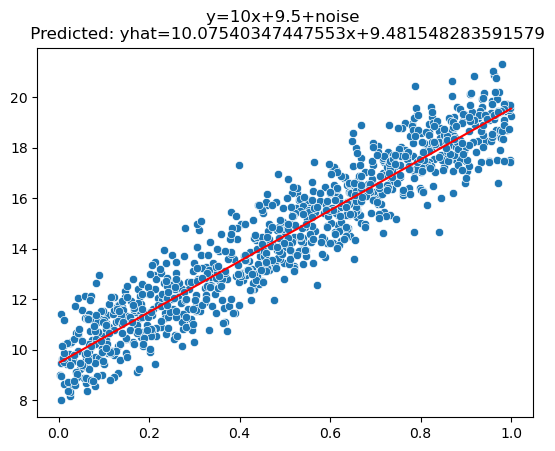

In [31]:
# Now plot the line over the dots to show fit
# We get the predictions from our trained model object by accessing the .predictions attribute
e = sns.scatterplot(x=l[0].flatten(), y=l[1])
sns.lineplot(x=l[0].flatten(), y=lr.predictions, color='red')
plt.title("y={}x+{}+noise \n Predicted: yhat={}x+{}".format(10,9.5,weights.flatten()[0], bias))
plt.show()